# Req

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from itertools import filterfalse, product

# Data Generation
---

- Skenario 1: Data dari tiap kelas berasal dari bivariate Gaussian distributions dengan komponennya tidak saling berkolerasi, dan memiliki rata-rata berbeda.
- Skenario 2: Data dari tiap kelas berasal dari pencampuran 10 low-variance Gaussian distributions, dimana tiap rata-ratanya didistribusi menggunakan Gaussian distribution.

### Skenario 1

Bivariate gaussian:

$${\displaystyle B(x,y)={\frac {1}{2\pi \sigma _{X}\sigma _{Y}{\sqrt {1-\rho ^{2}}}}}\exp \left(-{\frac {1}{2(1-\rho ^{2})}}\left[\left({\frac {x-\mu _{X}}{\sigma _{X}}}\right)^{2}-2\rho \left({\frac {x-\mu _{X}}{\sigma _{X}}}\right)\left({\frac {y-\mu _{Y}}{\sigma _{Y}}}\right)+\left({\frac {y-\mu _{Y}}{\sigma _{Y}}}\right)^{2}\right]\right)}$$

Bivariate (Un-correlated) gaussian:

$${\displaystyle f(x,y)={\frac {1}{2\pi \sigma _{X}\sigma _{Y}}}}\exp \left(-{\frac {1}{2}}\left[\left({\frac {x-\mu _{X}}{\sigma _{X}}}\right)^{2}+\left({\frac {y-\mu _{Y}}{\sigma _{Y}}}\right)^{2}\right]\right)$$

### Skenario 2

Mixture of Bivariate Gaussian:

$$ \displaystyle M(x,y) = \sum_{i=1}^{k} \pi_{w_{i}} B_{i}(x,y)$$

In [2]:
def bivariate_gauss(x, y, mean=[0,1], sigma=[1, 1]):
    """   
    Generate bivariate gaussian distribution.
    
    mean = 1-D array-like, of length 2.
        mean of bivariate Gaussian distribution.
        
    sigma = 1-D array_like, of length 2.
        standard deviation of bivariate Gaussian distribution.
    """  
    return (1./(2 * np.pi * sigma[0] * sigma[1])) * np.exp(-(1/2)*( ((x-mean[0])/(sigma[0]))**2 + ((y - mean[1])/(sigma[1]))**2 ))

#skenario 1
def generate_data1(sample_size=300, length=5, mean=[0,1], sigma=[1, 1], data_size=50):
    """   
    Random sampling from bivariate gaussian distribution.
    
    sample_size = int.
        length of sample.
    
    data_size = int.
        size of data.
    
    length = int.
        length of bivariate gaussian distribution
    
    mean = 1-D array-like, of length 2.
        mean of bivariate Gaussian distribution.
        
    sigma = 1-D array_like, of length 2.
        standard deviation of bivariate Gaussian distribution.
    """
    x = np.linspace(-length, length, num=data_size)
    y = np.linspace(-length, length, num=data_size)
    x, y = np.meshgrid(x,y)
    z = bivariate_gauss(x, y, mean, sigma)
    out = np.column_stack((x.ravel(),y.ravel(), z.ravel()))

    factor = []
    for _ in range(sample_size):
        k = random.choices([z for z in range(data_size**2)], weights=out[:,2])
        while k in factor:
            k = random.choices([z for z in range(data_size**2)], weights=out[:,2])
        factor.append(k)
    return np.array([np.array(out[x,0:2]).ravel() for x in factor]) 

    

def mixture_dist(x=0, y=0, data_size=50,  mean_means=[0,0], sigma=[1,1], length = 5):
    """    
    Generate mixture of ten bivariate gaussian distribution with standard deviation incresing + 1 each order,
    and mean choosen randomly from bivariate gaussian distribution.
    
    mean_means = 1-D array-like, of length 2.
        mean of bivariate gaussian distribution for mean of mixture gaussian.
        
    sigma = 1-D array_like, of length 2.
        standard deviation of mixture Gaussian distribution .
        
    data_size = int.
        size of data.
        
    length = int.
        length of bivariate gaussian distribution.
        
    """
    sigma_mix = np.array([1,1]) 
    
    if sigma[0] != 1 or sigma[1] != 1:
        sigma_mix = sigma
    
    mix_dist = np.zeros([data_size, data_size])
    
    mean = generate_data1(50, 5, mean = mean_means, sigma = sigma, data_size = data_size)
    for _ in range(1,11):
        sigma_mix += 1
        mix_dist += (1/10)*bivariate_gauss(x,y,random.choice(mean), sigma_mix/5 )
    return mix_dist
    
    
    
#skenario 2
def generate_data2(sample_size=300, length=5, sigma_means=[1,1], data_size=50, mean_means=[0,0]):
    
    """   
    Random sampling from mixture gaussian distribution.
    
    sample_size = int.
        length of sample.
    
    data_size = int.
        size of data.
    
    length = int.
        length of bivariate gaussian distribution.
        
    sigma_means = 1-D array_like, of length 2.
        standard deviation of bivariate Gaussian distribution for sigma of mixture gaussian.
    
    mean_means = 1-D array-like, of length 2.
        mean of bivariate gaussian distribution for mean of mixture gaussian.
        
    sigma = 1-D array_like, of length 2.
        standard deviation of bivariate Gaussian distribution.
    """
    
    x = np.linspace(-length, length, num=data_size)
    y = np.linspace(-length, length, num=data_size)
    x, y = np.meshgrid(x,y)
    z = mixture_dist(x, y, sigma = sigma_means, mean_means = mean_means, data_size=data_size, length=length)
    out = np.column_stack((x.ravel(),y.ravel(), z.ravel()))
    
    factor = []
    for _ in range(sample_size):
        k = random.choices([z for z in range(data_size**2)], weights=out[:,2])
        while k in factor:
            k = random.choices([z for z in range(data_size**2)], weights=out[:,2])
        factor.append(k)
    return np.array([np.array(out[x,0:2]).ravel() for x in factor])
    

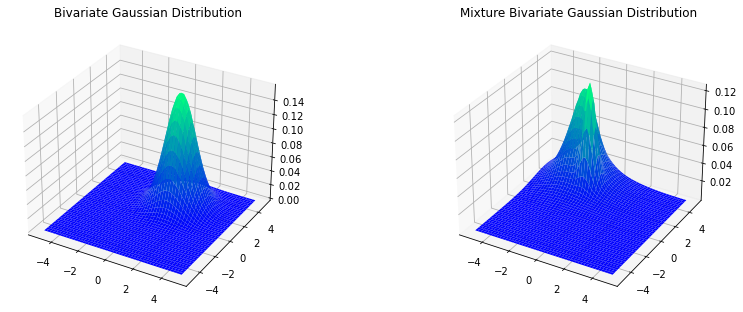

In [3]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
x, y = np.meshgrid(x, y)
z_gauss = bivariate_gauss(x,y, mean=[1,2])
z_mix = mixture_dist(x,y, mean_means=[-2,4])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d', title="Bivariate Gaussian Distribution")
ax.plot_surface(x, y, z_gauss, cmap=cm.winter)
ax = fig.add_subplot(1, 2, 2, projection='3d', title="Mixture Bivariate Gaussian Distribution")
ax.plot_surface(x,y, z_mix,  cmap=cm.winter)
plt.tight_layout(pad=0.4, w_pad=15, h_pad=1.0)

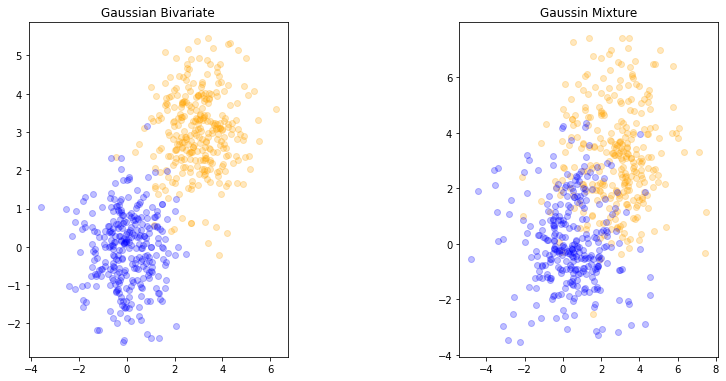

In [4]:
def plot_data(orange_data, blue_data): 
    axes.plot(orange_data[:, 0], orange_data[:, 1], 'o', color='orange', alpha=0.25)
    axes.plot(blue_data[:, 0], blue_data[:, 1], 'o', color='blue', alpha=0.25)

sample_size = 300

blue_data_gauss = generate_data1(sample_size, length=8, data_size=1000, mean=[0,0])
orange_data_gauss = generate_data1(sample_size, length=8, data_size=1000, mean=[3,3])

blue_data_mix = generate_data2(sample_size, length=8,data_size=1000, mean_means=[0,0], sigma_means=[1,1])
orange_data_mix = generate_data2(sample_size, length=8, data_size=1000, mean_means=[3,3], sigma_means=[1,1])

# plotting
fig = plt.figure(figsize = (10, 10))
axes = fig.add_subplot(2, 2, 1, title='Gaussian Bivariate')
plot_data(orange_data_gauss, blue_data_gauss)
axes = fig.add_subplot(2, 2, 2, title='Gaussin Mixture')
plot_data(orange_data_mix, blue_data_mix)
plt.tight_layout(pad=0.4, w_pad=15, h_pad=1.0)


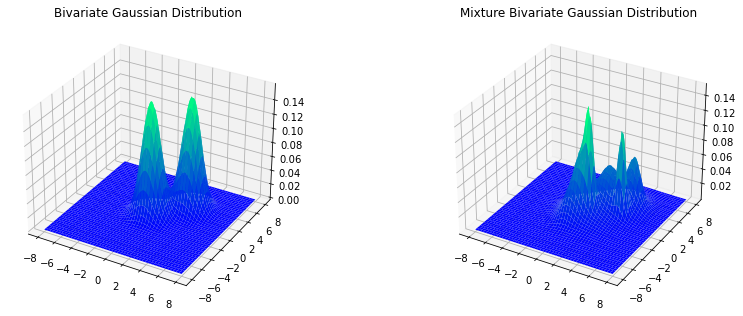

In [5]:
x = np.linspace(-8, 8, 1000)
y = np.linspace(-8, 8, 1000)
x, y = np.meshgrid(x, y)
z_gauss = bivariate_gauss(x,y, mean=[0,0]) + bivariate_gauss(x,y, mean=[3,3])
z_mix = mixture_dist(x,y, mean_means=[0,0], sigma=[1,1], data_size=1000) + mixture_dist(x,y, mean_means=[3,3], data_size=1000, sigma=[1, 1])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 2, 1, projection='3d', title="Bivariate Gaussian Distribution")
ax.plot_surface(x, y, z_gauss, cmap=cm.winter)
ax = fig.add_subplot(1, 2, 2, projection='3d', title="Mixture Bivariate Gaussian Distribution")
ax.plot_surface(x,y, z_mix,  cmap=cm.winter)
plt.tight_layout(pad=0.4, w_pad=15, h_pad=1.0)
plt.show()

# Least square: Liner Model

---

Linear Model:

$$\hat{{Y}} = \hat{\beta_{0}} + \sum_{j=1}^{p} {X}_{j} \hat{\beta_{j}}.$$

dalam matrik:

$$\hat{Y} = X^T \hat{\beta}.$$

where: $X^T = \{1, {X}_{1}, {X}_{2} ...., {X}_{p} \}$ \\ 

Cara umum, dan tergampang untuk fit model linear ini ke dalam himpunan training data adalah menggungakan metode least square dimana residual sum of square akan diminimalisasi dengan memilah $\beta$.
 
$$RSS(\beta) = \sum_{i=1}^{N} (y_{i} - x_{i}^{T} \beta)^{2}.$$

dalam matriks:

$$RSS(\beta) = (\textbf{y} - \textbf{X} \beta)^{T}(\textbf{y} - \textbf{X} \beta).$$

Sehingga apabila diturunkan didapatkan:

$$\beta = (\textbf{X}^{T} \textbf{X})^{-1}\textbf{X}^{T}\textbf{y}.$$

In [6]:
class LinearRegression:
    def fit(self, X, y):
        x = np.c_[np.ones((X.shape[0], 1)),X]
        self.beta = np.linalg.inv(x.T @ x) @ x.T @ y
        
        return self
        
    def predict(self, x):
        return np.dot(self.beta, np.r_[1, x])

data_gauss_x = np.r_[blue_data_gauss, orange_data_gauss]
data_mix_x = np.r_[blue_data_mix, orange_data_mix]
data_gauss_y = np.r_[np.zeros(sample_size), np.ones(sample_size)]
data_mix_y = np.r_[np.zeros(sample_size), np.ones(sample_size)]

model_gauss = LinearRegression().fit(data_gauss_x, data_gauss_y)
model_mix = LinearRegression().fit(data_mix_x, data_mix_y)
print("Beta gauss: ", model_gauss.beta)
print("Beta mix: ", model_mix.beta)

Beta gauss:  [0.10297843 0.13426867 0.13504878]
Beta mix:  [0.15989313 0.10314557 0.11202729]


### Plotting Linear Model
---
Karena yang akan dibuat adalah klasifikasi dengan ketentuan model fit $\vec{y} = 0.5$ merupakan decision boundary-nya sehingga:

$$ \beta + x_{0} \beta_{0} + x_{1} \beta_{1} = 0.5 $$


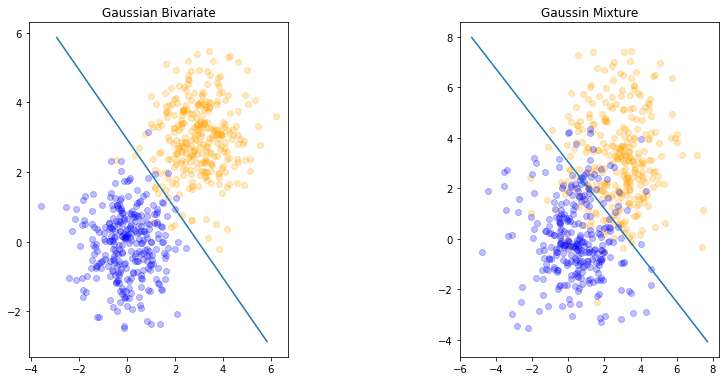

In [7]:
def find_x(model):
    return lambda x: (0.5 - model.beta[0] - x*model.beta[2])/ model.beta[1]

#data gauss
fig = plt.figure(figsize = (10, 10))
axes = fig.add_subplot(2, 2, 1, title='Gaussian Bivariate')
plot_data(orange_data_gauss, blue_data_gauss)
ylim = axes.get_ylim()
axes.plot([*map(find_x(model_gauss), ylim)],ylim)

#data_mix
axes = fig.add_subplot(2, 2, 2, title='Gaussin Mixture')
plot_data(orange_data_mix, blue_data_mix)
ylim = axes.get_ylim()
axes.plot([*map(find_x(model_mix), ylim)], ylim)
plt.tight_layout(pad=0.4, w_pad=15, h_pad=1.0)

# K-Nearest Neighbour

___

$$\hat{Y} = \frac{1}{k} \sum_{x_{i} \in N_{k}(X)} y_{i}$$

Dimana $N_{k}(X)$ merupakan ketetanggan dari x didefinisikan sebagai k poin tedekat di training sample.

In [8]:
class Knn:
    
    def __init__(self,k):
        self.k = k
        
    def fit(self,x,y):
        self.x = x
        self.y = y
        
        return self
        
    def predict(self,x_test):
        x, y, k = self.x, self.y, self.k
        distance = np.sqrt(((x - x_test)**2).sum(axis=1)) 
        
        return np.mean(y[distance.argpartition(k)[:k]]) 

# Plotting KNN
___

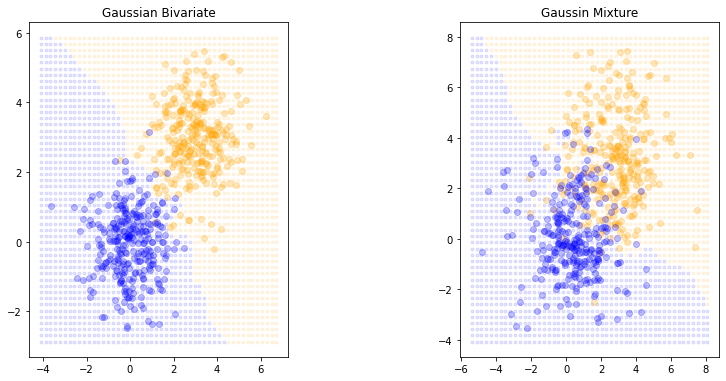

In [9]:
def plot_grid(orange_grid, blue_grid): 
    axes.plot(orange_grid[:, 0], orange_grid[:, 1], '.', color='orange', alpha=0.1, zorder = 0.001)
    axes.plot(blue_grid[:, 0], blue_grid[:, 1], '.', color='blue', alpha=0.1, zorder = 0.001)



#data gauss
fig = plt.figure(figsize = (10, 10))
axes = fig.add_subplot(2, 2, 1, title='Gaussian Bivariate')
plot_data(orange_data_gauss, blue_data_gauss)

grid = np.array([*product(np.linspace(*axes.get_xlim(), 50), np.linspace(*axes.get_ylim(), 50))])

model = Knn(3).fit(data_gauss_x, data_gauss_y)
orange = lambda x : model.predict(x) > 0.5
orange_grid_gauss = np.array([*filter(orange, grid)])
blue_grid_gauss = np.array([*filterfalse(orange, grid)])
plot_grid(orange_grid_gauss, blue_grid_gauss)


#data_mix
axes = fig.add_subplot(2, 2, 2, title='Gaussin Mixture')
plot_data(orange_data_mix, blue_data_mix)

grid = grid = np.array([*product(np.linspace(*axes.get_xlim(), 50), np.linspace(*axes.get_ylim(), 50))])

model = Knn(3).fit(data_mix_x, data_mix_y)
orange = lambda x : model.predict(x) > 0.5
orange_grid_mix = np.array([*filter(orange, grid)])
blue_grid_mix = np.array([*filterfalse(orange, grid)])
plot_grid(orange_grid_mix, blue_grid_mix)
plt.tight_layout(pad=0.4, w_pad=15, h_pad=1.0)

## Komparasi regresi linear, dan knn

___

In [10]:
blue_data_mix2 = generate_data2(1000, length=8,data_size=2000, mean_means=[0,0], sigma_means=[1,1])
orange_data_mix2 = generate_data2(1000, length=8, data_size=2000, mean_means=[3,3], sigma_means=[1,1])

In [32]:
data_x = np.r_[blue_data_mix2, orange_data_mix2]
data_y = np.r_[np.zeros(1000), np.ones(1000)]

#regresi linear 
model_mix = LinearRegression().fit(data_mix_x, data_mix_y)
n = 0
result = 0

for i in range(len(data_mix_x)):
    n += 1
    if model_mix.predict(data_mix_x[i]) > 0.5:
        kelas = 1
    else:
        kelas = 0
    result += (data_mix_y[i] - kelas)**2

result_lr_train = (1/n)*result

n = 0
result = 0
for i in range(len(data_x)):
    n += 1
    if model_mix.predict(data_x[i]) > 0.5:
        kelas = 1
    else:
        kelas = 0
    result += (data_y[i] - kelas)**2

result_lr_test = (1/n)*result

#k-nn
result_list_train = []
result_list_test = []
for i in range(len(data_mix_x)):
    model = Knn(i).fit(data_mix_x, data_mix_y)
    n = 0
    result = 0
    
    for j in range(len(data_mix_x)):
        n += 1
        if model.predict(data_mix_x[j]) > 0.5:
            kelas = 1
        else:
            kelas = 0
        result +=  (data_mix_y[i] - kelas)**2
    result = (1/n)*result
    result_list_train.append(result)
    
    n = 0
    result = 0
    
    for j in range(len(data_x)):
        n += 1
        if model.predict(data_x[j]) > 0.5:
            kelas = 1
        else:
            kelas = 0
        result +=  (data_y[i] - kelas)**2
    result = (1/n)*result
    result_list_test.append(result)

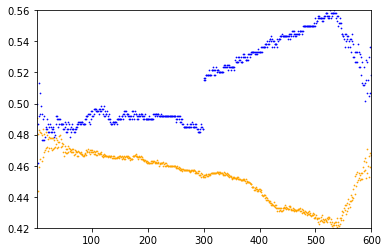

In [58]:
plt.xlim(1,600)
plt.ylim(0.42, 0.56)
plt.scatter(range(len(data_mix_x)), result_list_train, s=0.5, color='blue')
plt.scatter(range(len(data_mix_x)), result_list_test, s=0.5, color='orange')